In [0]:
#Thomas Legge

The following is a example of a model that trains on images of hands signing sign language. 

This is based on the coursework I completed in achieving the TensorFlow in Practice Specialization by Laurence Moroney of Google Brain

https://www.coursera.org/specializations/tensorflow-in-practice

https://www.coursera.org/instructor/lmoroney

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

Dataset at: https://www.kaggle.com/datamunge/sign-language-mnist/home


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


The below block is taken from the course and shows how the shape of the data and the data itself is read into the program for the model to be fit to.

In [0]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

The complexity of the data and model make training time take longer. This model seen in the summary seems optomal for my purposes, additional dense layers may help but overfitting seems more apparent in the final graph.

In [11]:
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 48s 56ms/step - loss: 2.8821 - accuracy: 0.1280 - val_loss: 2.1645 - val_accuracy: 0.2966
Epoch 2/15
858/857 [==============================] - 48s 55ms/step - loss: 2.1666 - accuracy: 0.3134 - val_loss: 1.5175 - val_accuracy: 0.4710
Epoch 3/15
858/857 [==============================] - 48s 55ms/step - loss: 1.7942 - accuracy: 0.4212 - val_loss: 1.2267 - val_accuracy: 0.5915
Epoch 4/15
858/857 [==============================] - 48s 56ms/step - loss: 1.5716 - accuracy: 0.4887 - val_loss: 1.0209 - val_accuracy: 0.6538
Epoch 5/15
858/857 [==============================] - 48s 56ms/step - loss: 1.4200 - accuracy: 0.5353 - val_loss: 0.9250 - val_accuracy: 0.6804
Epoch 6/15
858/857 [==============================] - 48s 56ms/step - loss: 1.3112 - accuracy: 0.5709 - val_loss: 0.7603 - val_accuracy: 0.7271
Epoch 7/15
858/857 [==============================] - 48s 56ms/step - loss: 1.2081 - accuracy: 0.6034 - val_loss: 0.8425 - val_accuracy:

[233.45367431640625, 0.5390406847000122]

Below is a plot from the course showing how loss and accuracy improve. The change is constant enough at this stage that I would not expect overfitting to be to problematic, however additonal epochs may introduce overfitting.

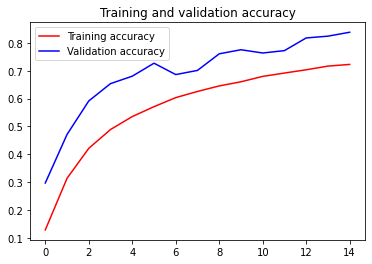

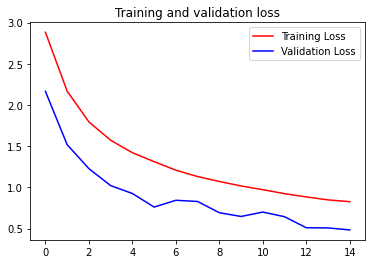

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()